In [60]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/passenger-list-for-the-estonia-ferry-disaster/estonia-passenger-list.csv


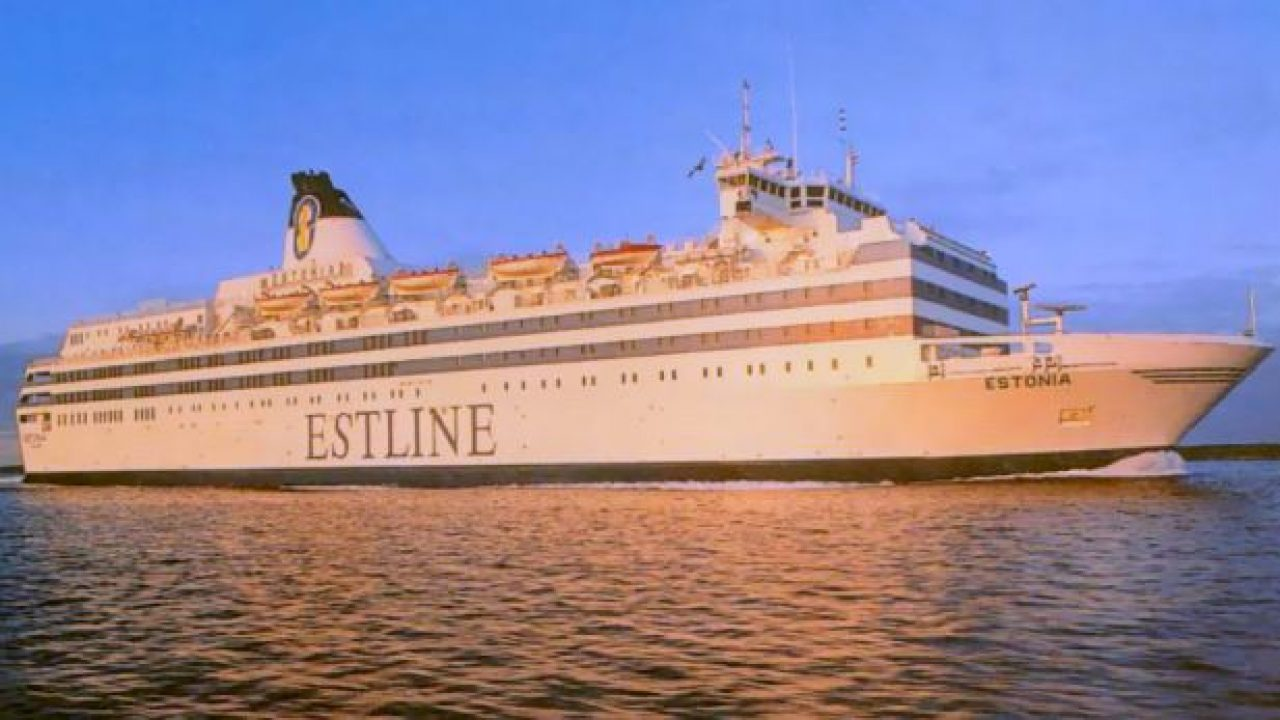

# **A brief story**

**MS Estonia Disaster:**

The MS Estonia sinking occurred in the year 1994 in the month of September as the vessel was passing through the Baltic Sea from the Estonian province of Tallinn to her intended destination of Stockholm. At the time of the MS Estonia disaster nearly 1,000 people were aboard it, both voyagers and crewing personnel included and only a minuscule proportion of people were managed to be successfully saved from the wreckage of the unfortunate vessel.

The timing of the voyage was such that turbulent climatic conditions plagued the transiting through the Baltic Sea. Heavy gales lashed the vessel, making steerage difficult whilst trying to maintain the speed of the vessel. Thus though a common thread about the actual causation of the disaster remains that the weather played a major role in destabilising the ship, sources vary in their account of how the vessel started to heel in the Baltic Sea.

* I know that Proofling is an excellent tool but I prefer to dissect the data manually.

# **Importing the libraries**

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
df = pd.read_csv('../input/passenger-list-for-the-estonia-ferry-disaster/estonia-passenger-list.csv')

In [63]:
df.head()

,PassengerId,Country,Firstname,Lastname,Sex,Age,Category,Survived
0,1,Sweden,ARVID KALLE,AADLI,M,62,P,0
1,2,Estonia,LEA,AALISTE,F,22,C,0
2,3,Estonia,AIRI,AAVASTE,F,21,C,0
3,4,Sweden,JURI,AAVIK,M,53,C,0
4,5,Sweden,BRITTA ELISABET,AHLSTROM,F,55,P,0


In [64]:
df.describe()

,PassengerId,Age,Survived
count,989.000000,989.000000,989.000000
mean,494.992922,44.575329,0.138524
std,285.643660,17.235146,0.345624
min,1.000000,0.000000,0.000000
25%,248.000000,30.000000,0.000000
50%,495.000000,44.000000,0.000000
75%,742.000000,59.000000,0.000000
max,989.000000,87.000000,1.000000


# **Lets check if there is some null data**

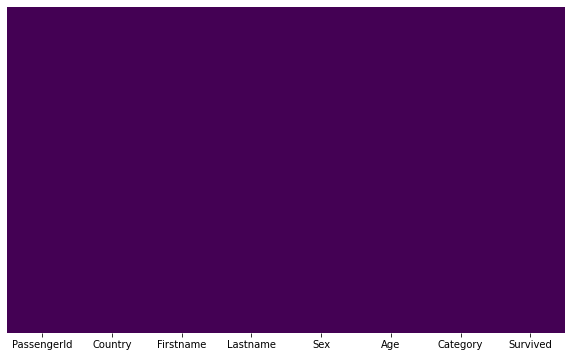

In [65]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Let's check it if realy theres no null data:

In [66]:
df.isnull().sum()

PassengerId    0
Country        0
Firstname      0
Lastname       0
Sex            0
Age            0
Category       0
Survived       0
dtype: int64

# None, cool, lets go on.

In [67]:
df['Sex'].replace('M',1,inplace=True)
df['Sex'].replace('F',0,inplace=True)
df['Category'].replace('P',1,inplace=True)
df['Category'].replace('C',0,inplace=True)

# As you guys can see above, I replaced the 'Sex' and 'Category' in a binary numbers.Now, lets check the correlated sets.

In [68]:
df.corr()

,PassengerId,Sex,Age,Category,Survived
PassengerId,1.000000,0.064499,-0.073684,-0.108356,0.036620
Sex,0.064499,1.000000,-0.053819,0.072258,0.236082
Age,-0.073684,-0.053819,1.000000,0.325096,-0.245832
Category,-0.108356,0.072258,0.325096,1.000000,-0.090583
Survived,0.036620,0.236082,-0.245832,-0.090583,1.000000


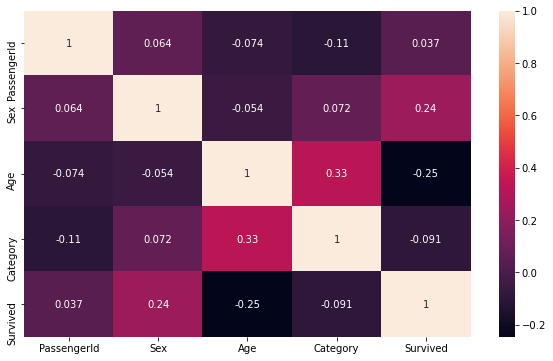

In [69]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

# Hummm, the best correlated are Age and Category. Let's keep digging...

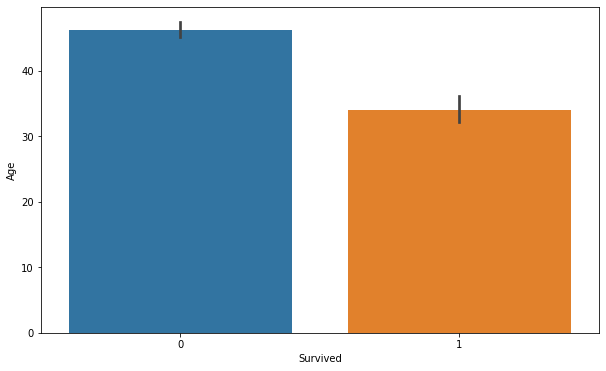

In [70]:
plt.figure(figsize=(10,6))
sns.barplot(x='Survived',y='Age',data=df)

# * Unfortunatly the most of people that dead was about 0 and 40 years old (mean), and the few ones who survived was between 0 and 30 years old.

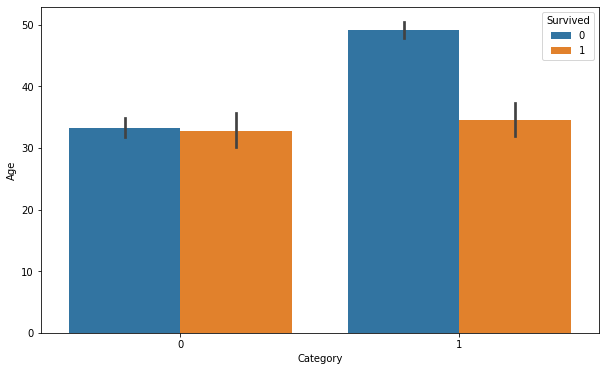

In [71]:
plt.figure(figsize=(10,6))
sns.barplot(x='Category',y='Age',data=df,hue='Survived')

# That's the answer. The Age of survivors beetween passengers and crew is almost the same with the exception of  survivors passengers.

In [72]:
df['Country'].unique()

array(['Sweden', 'Estonia', 'Latvia', 'Russia', 'Germany', 'Finland',
       'Great Britain', 'Morocco', 'Denmark', 'France', 'Netherlands',
       'Norway', 'Lithuania', 'Nigeria', 'Canada', 'Belarus'],
      dtype=object)

# * There's a great variety of people from many countries

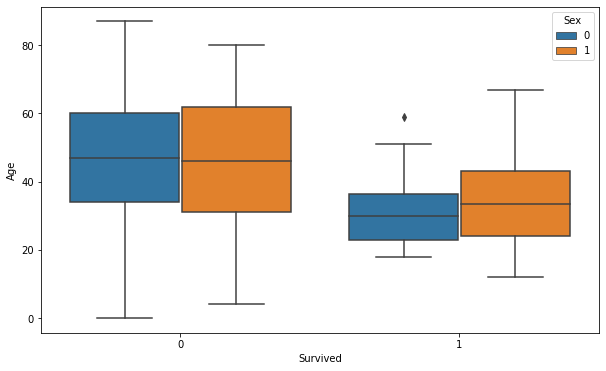

In [73]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Survived',y='Age',data=df,hue='Sex')

# * Above we can see more clearly than the average of deaths, both male and female is over 40 years old. The survivors, on the other hand, are under 40 years old.


# How many passengers died according to nationality?

# A top five countries

In [74]:
df[(df['Survived']==0)&(df['Category']==1)]['Country'].value_counts().head(5)

Sweden     489
Estonia    144
Latvia      22
Finland      9
Russia       7
Name: Country, dtype: int64

# Of these, how many were adults?

In [75]:
df[(df['Survived']==0)&(df['Category']==1)&(df['Age']>=18)]['Country'].value_counts().head(5)

Sweden     485
Estonia    137
Latvia      18
Finland      9
Russia       7
Name: Country, dtype: int64

# How many were children?

In [76]:
df[(df['Survived']==0)&(df['Category']==1)&(df['Age']<18)]['Country'].value_counts().head(5)

Estonia      7
Latvia       4
Sweden       4
Norway       2
Lithuania    1
Name: Country, dtype: int64

# How many people survived according to nationality?

In [77]:
df[(df['Survived']==1)&(df['Category']==1)]['Country'].value_counts().head(5)

Sweden     46
Estonia    31
Latvia      6
Finland     5
Norway      3
Name: Country, dtype: int64

# How many people were adults?

In [78]:
df[(df['Survived']==1)&(df['Category']==1)&(df['Age']>=18)]['Country'].value_counts().head(5)

Sweden     46
Estonia    29
Latvia      6
Finland     5
Germany     3
Name: Country, dtype: int64

# How many children survived?

In [79]:
df[(df['Survived']==1)&(df['Category']==1)&(df['Age']<18)]['Country'].value_counts().head(5)

Estonia    2
Norway     1
Name: Country, dtype: int64

# How many crew members perish?

In [80]:
df[(df['Category']==0)&(df['Survived']==0)]['Country'].value_counts()

Estonia    136
Sweden      12
Russia       5
Finland      1
Name: Country, dtype: int64

# Well, let's check out our chances of survival. Cross your fingers.

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
X = df[['Sex','Age','Category']]
y = df['Survived']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [84]:
from sklearn.tree import DecisionTreeClassifier

In [85]:
dtree = DecisionTreeClassifier()

In [86]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [87]:
predictions_dtree = dtree.predict(X_test)

In [88]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [89]:
print(confusion_matrix(y_test,predictions_dtree))
print(classification_report(y_test,predictions_dtree))
print('\n')
print('Acurácia:',np.round(accuracy_score(y_test,predictions_dtree),3)*100,'%')

[[240  18]
 [ 32   7]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.91       258
           1       0.28      0.18      0.22        39

    accuracy                           0.83       297
   macro avg       0.58      0.55      0.56       297
weighted avg       0.80      0.83      0.82       297



Acurácia: 83.2 %


# * Well, it's quite certain we're all goin' to die. But don't worry, maybe the Random Forrest could save us.

In [90]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
rfc = RandomForestClassifier(n_estimators=200)

In [92]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [93]:
rfc_predict = rfc.predict(X_test)

In [94]:
print(confusion_matrix(y_test,rfc_predict))
print(classification_report(y_test,rfc_predict))
print('\n')
print('Acurácia:',np.round(accuracy_score(y_test,rfc_predict),3)*100,'%')

[[237  21]
 [ 32   7]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       258
           1       0.25      0.18      0.21        39

    accuracy                           0.82       297
   macro avg       0.57      0.55      0.55       297
weighted avg       0.80      0.82      0.81       297



Acurácia: 82.19999999999999 %


# * Holly sh ...., this is almost the same score as Decision Tree. I think paradise could be a good place, after all I am already 40 years old.


# * Let's test one more predictor

In [95]:
from sklearn.linear_model import LogisticRegression

In [96]:
logmodel = LogisticRegression()

In [97]:
logmodel.fit(X_train,y_train)

LogisticRegression()

In [98]:
predict_LR = logmodel.predict(X_test)

In [99]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [100]:
print(classification_report(y_test,predict_LR))
print(confusion_matrix(y_test,predict_LR))
print('\n')
print('Acurácia:',np.round(accuracy_score(y_test,predict_LR),3)*100,'%')

              precision    recall  f1-score   support

           0       0.87      0.99      0.92       258
           1       0.00      0.00      0.00        39

    accuracy                           0.86       297
   macro avg       0.43      0.49      0.46       297
weighted avg       0.75      0.86      0.80       297

[[255   3]
 [ 39   0]]


Acurácia: 85.9 %


In [101]:
from sklearn.svm import SVC

In [102]:
model = SVC()

In [103]:
model.fit(X_train,y_train)

SVC()

In [104]:
predict_svc = model.predict(X_test)

In [105]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [106]:
print(classification_report(y_test,predict_svc))
print(confusion_matrix(y_test,predict_svc))
print('\n')
print('Acurácia:',np.round(accuracy_score(y_test,predict_svc),3)*100,'%')

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       258
           1       0.00      0.00      0.00        39

    accuracy                           0.87       297
   macro avg       0.43      0.50      0.46       297
weighted avg       0.75      0.87      0.81       297

[[258   0]
 [ 39   0]]


Acurácia: 86.9 %


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [107]:
accuracy_dtree = np.round(accuracy_score(y_test,predictions_dtree),4)*100
accuracy_rfc = np.round(accuracy_score(y_test,rfc_predict),4)*100
accuracy_LR = np.round(accuracy_score(y_test,predict_LR),4)*100
accuracy_svc = np.round(accuracy_score(y_test,predict_svc),4)*100


In [109]:
print('Accuracy_Decision_tree: ',accuracy_dtree,'%')
print('Accuracy_Random_Forest: ', accuracy_rfc,'%')
print('Accuracy_LR: ', accuracy_LR,'%')
print('Accuracy_SVC: ', accuracy_svc,'%')

Accuracy_Decision_tree:  83.16 %
Accuracy_Random_Forest:  82.15 %
Accuracy_LR:  85.86 %
Accuracy_SVC:  86.87 %


# Our predictions worked very similarly and as we could see earlier and below, the number of people who survived were very few.
# The accuracy score worked differently for all predictors, being better ranked in SVC. Unfortunately, I think we will not survive unless we are of a nationality other than Scottish or Lithuanian.
# That's it for today guys. Don't forget to vote positive if you liked it, if you didn't like it please comment. Thank you!